<a href="https://colab.research.google.com/github/rcruzalegui/natto-repo/blob/master/rcruzalegui_lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import fetch_openml
from sklearn.utils import check_random_state
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(tf.__version__)

2.6.0


In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
data = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

One way to examine the image is to check the range of the pixel values, it can range from 0 which is black to 255 which is white. 

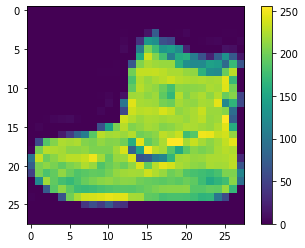

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

We need to scale the values down between 0 to 1 

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

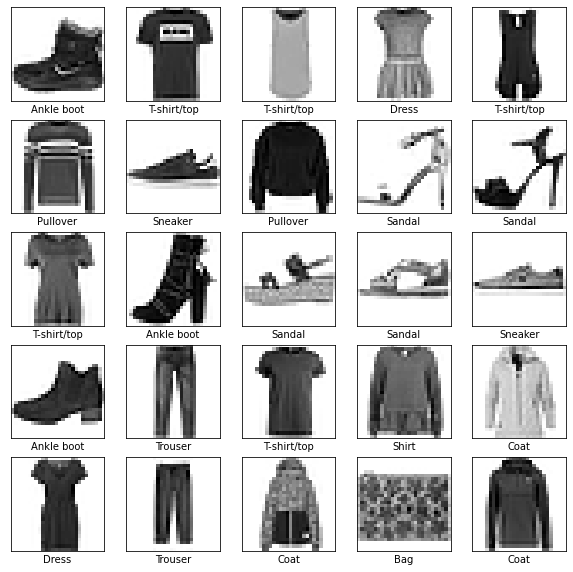

In [59]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## New Model - Train - Compile - Neural Network Classification Model

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

Compile Model 

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Train the Model 

In [ ]:
model.fit(train_images, train_labels, epochs=50)

Evaluate Accuracy 

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

Changed Optimizer from Adam to SGD 

In [ ]:
model.compile(optimizer='sgd',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=50)

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

## Random Forest and Naive Bayer 

In [ ]:
X, y = fetch_openml('Fashion-MNIST', version=1, return_X_y=True)

SCRUB

In [ ]:
# SCRUB
random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

In [ ]:
# SCRUB - FOR TESTING USE SMALLER
train_samples = 60000

In [ ]:
# SCRUB - TEST / TRAIN SPLIT

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_samples, test_size=10000)

### Random Forests

In [ ]:
# MODEL BUILD - RANDOM FORESTS

from sklearn.ensemble import RandomForestClassifier 
forest = RandomForestClassifier(n_estimators = 10)
forest.fit(X_train, y_train)
print('Score: ', forest.score(X_test, y_test))
predictions = forest.predict(X_test)

Score:  0.8428


### NAIVE BAYES

In [ ]:
# MODEL

# Initialize our classifier
gnb = GaussianNB()

# Train our classifier
model = gnb.fit(X_train, y_train)

In [ ]:
# MODEL

# Make predictions
preds = gnb.predict(X_test)


In [ ]:
# MODEL
# Evaluate accuracy
print(accuracy_score(y_test, preds))

0.5984


In [ ]:
# INTERPRET
expected = y_test
predicted = preds
conf_mat = confusion_matrix(expected, predicted)
print(conf_mat)


[[616  42  25 185  92   0  19   0  27   0]
 [  0 919  10  30   3   0   5   0   0   0]
 [  4  10 293  72 538   0  18   0  17   0]
 [  7 275   2 679  36   0   3   0   3   0]
 [  1  26  34 142 790   0   5   0  10   0]
 [  0   0   0   1   0 271   6 701  16  41]
 [ 91  24 111 197 453   0  51   0  47   0]
 [  0   0   0   0   0   7   0 988   3  12]
 [  2   2   9  84 154   4  29   2 728   1]
 [  0   0   3   1   1  23   3 338   9 649]]


<function matplotlib.pyplot.show>

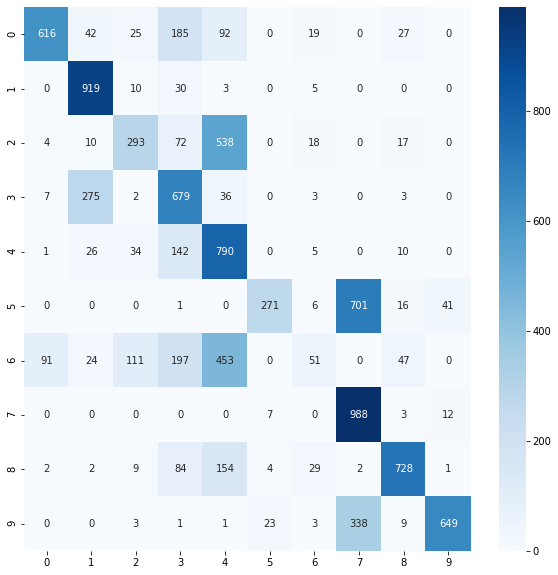

In [ ]:
plt.figure(figsize=(10,10))
plt.ylabel('True label')
plt.xlabel('Predicted label')
sns.heatmap(conf_mat,cmap='Blues',annot=True, fmt='d')
plt.show

In [60]:
print(classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.85      0.61      0.71      1006
           1       0.71      0.95      0.81       967
           2       0.60      0.31      0.41       952
           3       0.49      0.68      0.57      1005
           4       0.38      0.78      0.51      1008
           5       0.89      0.26      0.40      1036
           6       0.37      0.05      0.09       974
           7       0.49      0.98      0.65      1010
           8       0.85      0.72      0.78      1015
           9       0.92      0.63      0.75      1027

    accuracy                           0.60     10000
   macro avg       0.65      0.60      0.57     10000
weighted avg       0.66      0.60      0.57     10000

